Importing libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

Importing classes

In [2]:
#CMAB
from Strategies.ALinUCB import ALinUCB
from Strategies.CLinUCB import CLinUCB
from Strategies.LinUCB                    import LinUCB
from Strategies.LinUCBGlobal              import LinUCBGlobal
#Rewards
from Strategies.Rewards.BernoulliFeature   import BernoulliFeature

Init Parameters

In [3]:
iterations = 100
experimentos = 1
k = 10
d = 2
alpha = 0.3
user_amount = 100
max_prob = 0.3
noise = 0.3
cluster_amount = 2

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
reward_class = BernoulliFeature(k, d,user_amount,cluster_amount, max_prob, noise)

In [5]:
# Run experiments
linucb_regrets              = np.zeros((experimentos,iterations))
linucb_g_regrets              = np.zeros((experimentos,iterations))
linucb_cluster_regrets       = np.zeros((experimentos,iterations))
linucb_ag_regrets       = np.zeros((experimentos,iterations))
# Run experiments
for i in range(experimentos):
    print('exp: ' + str(i + 1) + '/' + str(experimentos))

    linucb       = LinUCB(k, iterations, reward_class, d, user_amount, alpha )
    linucbg      = LinUCBGlobal(k, iterations, reward_class, d, user_amount, alpha )
    linucbc      = CLinUCB(k, iterations, reward_class, d, user_amount, alpha, cluster_amount )
    linucba      = ALinUCB(k, iterations, reward_class, d, user_amount, alpha )

    linucb_cluster_regrets[i]           = linucbc.run()
    linucb_regrets[i]                   = linucb.run()
    linucb_g_regrets[i]                   = linucbg.run()
    linucb_ag_regrets[i]                   = linucba.run()


exp: 1/1
0/100
0/100
0/100
0/100


In [6]:
#linucb
linucb_inf            = np.percentile(linucb_regrets,inf_percentile ,axis=0)
linucb_median_rew     = np.median(linucb_regrets,axis=0)
linucb_sup            = np.percentile(linucb_regrets,sup_percentile ,axis=0)

linucb_g_inf            = np.percentile(linucb_g_regrets,inf_percentile ,axis=0)
linucb_g_median_rew     = np.median(linucb_g_regrets,axis=0)
linucb_g_sup            = np.percentile(linucb_g_regrets,sup_percentile ,axis=0)

linucb_c_inf            = np.percentile(linucb_cluster_regrets,inf_percentile ,axis=0)
linucb_c_median_rew     = np.median(linucb_cluster_regrets,axis=0)
linucb_c_sup            = np.percentile(linucb_cluster_regrets,sup_percentile ,axis=0)

linucb_a_inf            = np.percentile(linucb_ag_regrets,inf_percentile ,axis=0)
linucb_a_median_rew     = np.median(linucb_ag_regrets,axis=0)
linucb_a_sup            = np.percentile(linucb_ag_regrets,sup_percentile ,axis=0)

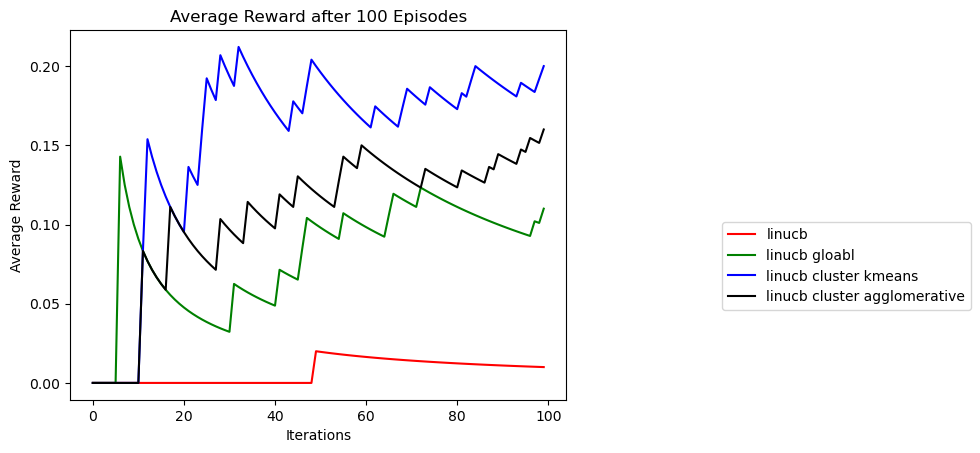

In [7]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb", color='red')
plt.plot(linucb_g_median_rew,label="linucb gloabl", color='green')
plt.plot(linucb_c_median_rew,label="linucb cluster kmeans", color='blue')
plt.plot(linucb_a_median_rew,label="linucb cluster agglomerative", color='black')

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


In [8]:
max_prob = np.zeros(user_amount)
for i in range(user_amount):
    max_prob[i] = np.max(reward_class.get_probabilities(i))
print(max_prob)
print(np.average(max_prob))

[0.29998589 0.29999323 0.29998414 0.29999357 0.29999929 0.29997881
 0.29999601 0.29999115 0.29997641 0.2999997  0.29999866 0.29999746
 0.29999928 0.29998597 0.29996883 0.29999847 0.3        0.29998174
 0.2999902  0.29996753 0.29997844 0.29999956 0.29999968 0.2999803
 0.29999997 0.29998554 0.29998855 0.29999997 0.29997733 0.29998461
 0.29999995 0.2999842  0.29997757 0.29996691 0.29999999 0.29999413
 0.29999311 0.29999247 0.29999989 0.29987462 0.29999532 0.29999553
 0.29999941 0.29998219 0.29999838 0.29999131 0.29999409 0.29999626
 0.29999854 0.2999999  0.27875945 0.28163    0.27998    0.28075102
 0.2816277  0.28105622 0.28232961 0.28184506 0.28142748 0.28067172
 0.27928202 0.28176121 0.28257429 0.28173779 0.28106098 0.28186352
 0.28123571 0.28008719 0.28256522 0.2796433  0.28058109 0.28218872
 0.27945808 0.28035101 0.28181121 0.28147181 0.28093053 0.28097409
 0.28107618 0.28088476 0.28272077 0.28070384 0.28153967 0.2807227
 0.28219086 0.28064931 0.28082011 0.28141899 0.28029784 0.281286

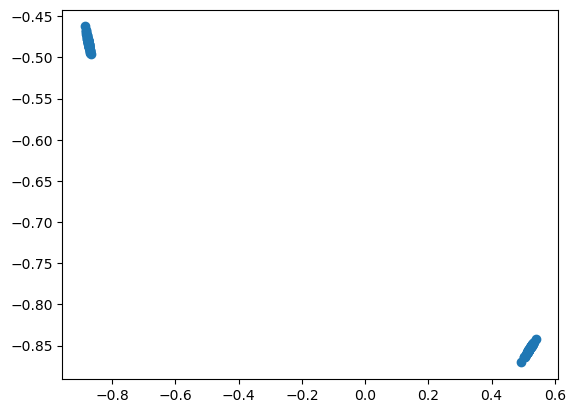

In [9]:
reward_class.graph()

In [10]:
linucbc.get_kmeans().graph()

AttributeError: 'CLinUCB' object has no attribute 'get_kmeans'